In [1]:
# importing libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
# load_dataset("lukebarousse/data_jobs")

In [3]:
data = load_dataset("lukebarousse/data_jobs")

In [4]:
df = data["train"].to_pandas()
# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.loc[:,"job_skills"] = df.loc[:,"job_skills"].apply(func=(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list))
df_exploded = df.explode(column="job_skills").copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [6]:
df_skill_count = (df_exploded
                  .groupby(by=["job_title_short", "job_skills"])
                  .size()
                  .reset_index()
                  .rename(columns={0:"skill_count"})
                  .sort_values(by="skill_count", ascending=False))

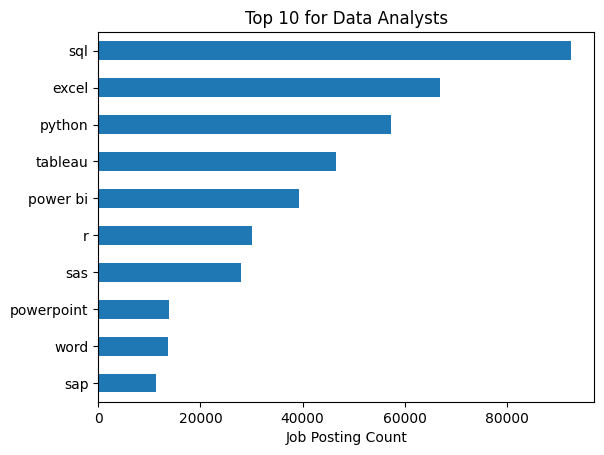

In [7]:
job_title = "Data Analyst"
top_skills_count = 10
role_top_skills = df_skill_count[df_skill_count["job_title_short"] == job_title].head(top_skills_count)
role_top_skills.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills_count} for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

# Excercise - Investigate Trending Skills

In [8]:
df_DS = df_exploded[df_exploded["job_title_short"] == "Data Scientist"].copy()

In [9]:
df_DS["job_posted_month_no"] = df_DS["job_posted_date"].dt.month

In [10]:
df_DS_pv = df_DS.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_DS_pv

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,494,5,301,109,1,58,6,16,11,19,...,0,193,18,656,0,2,1,0,30,36
2,331,4,199,59,1,38,6,7,1,21,...,0,144,7,478,0,1,0,0,31,27
3,322,1,165,61,0,36,8,7,4,12,...,0,147,4,453,1,0,0,0,5,35
4,338,5,147,49,2,40,13,5,4,13,...,0,188,10,441,0,0,0,0,15,32
5,276,8,144,51,2,37,3,8,4,11,...,0,119,2,396,0,0,0,2,12,31
6,266,9,157,79,0,30,8,7,11,16,...,0,168,1,389,0,3,0,1,17,22
7,300,6,187,58,0,20,15,1,20,8,...,0,164,3,391,0,0,0,0,35,37
8,374,4,213,72,0,31,13,6,11,15,...,0,226,2,515,0,0,0,0,29,26
9,315,7,156,58,2,41,9,6,8,8,...,0,119,2,361,0,0,8,1,17,24


In [11]:
# df_DS_pv.sum()
df_DS_pv.loc["Total"] = df_DS_pv.sum()

In [12]:
df_DS_pv = df_DS_pv.T.sort_values(by="Total", ascending=False).T
df_DS_pv.drop(index="Total", inplace=True)

In [13]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df_DS_pv.index = df_DS_pv.index.map(month_map)

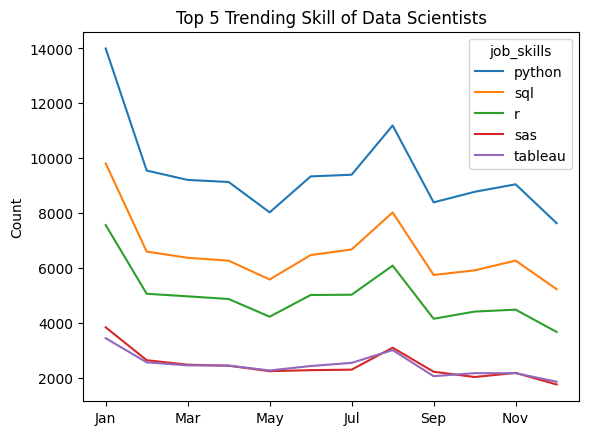

In [14]:
df_DS_pv.iloc[:,:5].plot()
plt.title("Top 5 Trending Skill of Data Scientists")
plt.ylabel("Count")
plt.xlabel("")
plt.show()